In [12]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

#np.random.seed() # shuffle random seed generator
#np.random.seed(0) # shuffle random seed generator

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import umap

import popsom as som

In [2]:
data_path = 'C:/Users/mlwin/Desktop/data_meta/phys_ML_data/ising_dataframes/'
data_file_ord = 'df_ising_ordered.csv'
data_file_crit = 'df_ising_critical.csv'
data_file_dis = 'df_ising_disordered.csv'

dfo = pd.read_csv(data_path + data_file_ord)
dfc = pd.read_csv(data_path + data_file_crit)
dfd = pd.read_csv(data_path + data_file_dis)

#df = pd.concat([dfo, dfc, dfd])
df = pd.concat([dfo, dfd])
df = df.reset_index(drop=True)
print(df.shape)
print(df.columns)
df.head(3)

(130000, 1602)
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1592', '1593', '1594', '1595', '1596', '1597', '1598', '1599', 'label',
       'T'],
      dtype='object', length=1602)


,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,label,T
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,0.25
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0.25
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0.25


In [3]:
# Ising model parameters
L=40 # linear system size
J=-1.0 # Ising interaction
T=np.linspace(0.25,4.0,16) # set of temperatures
T_c=2.26 # Onsager critical temperature in the TD limit

In [4]:
# shuffle data:

df = df.sample(frac=1.0, replace=False, random_state=1) # shuffle all
dfr = df.sample(frac=0.05, replace=False, random_state=1)
dfr = dfr.reset_index(drop=True)

print(df.shape)
print(dfr.shape)

(130000, 1602)
(6500, 1602)


In [5]:
df_X = dfr.drop(['label','T'], axis=1)
X = df_X.values
X_st = StandardScaler().fit_transform(X)

In [6]:
#pca = PCA(random_state=42)
#X_pca_2 = pca.fit_transform(StandardScaler().fit_transform(X))
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X_st)

In [7]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne2 = tsne.fit_transform(X_st)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6500 samples in 3.437s...
[t-SNE] Computed neighbors for 6500 samples in 118.932s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6500
[t-SNE] Computed conditional probabilities for sample 2000 / 6500
[t-SNE] Computed conditional probabilities for sample 3000 / 6500
[t-SNE] Computed conditional probabilities for sample 4000 / 6500
[t-SNE] Computed conditional probabilities for sample 5000 / 6500
[t-SNE] Computed conditional probabilities for sample 6000 / 6500
[t-SNE] Computed conditional probabilities for sample 6500 / 6500
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.124191
[t-SNE] KL divergence after 300 iterations: 2.957362


In [8]:
pca50 = PCA(n_components=50)
tsne2 = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_pca50 = pca50.fit_transform(X_st)
X_pca50_tsne2 = tsne2.fit_transform(X_pca50) # much faster with pca50!

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6500 samples in 0.161s...
[t-SNE] Computed neighbors for 6500 samples in 3.243s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6500
[t-SNE] Computed conditional probabilities for sample 2000 / 6500
[t-SNE] Computed conditional probabilities for sample 3000 / 6500
[t-SNE] Computed conditional probabilities for sample 4000 / 6500
[t-SNE] Computed conditional probabilities for sample 5000 / 6500
[t-SNE] Computed conditional probabilities for sample 6000 / 6500
[t-SNE] Computed conditional probabilities for sample 6500 / 6500
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.795082
[t-SNE] KL divergence after 300 iterations: 2.878754


plt.figure()

plt.subplot(1,3,1)
plt.scatter(x_pca2[:,0], x_pca2[:,1], c=df['T'], cmap='coolwarm')

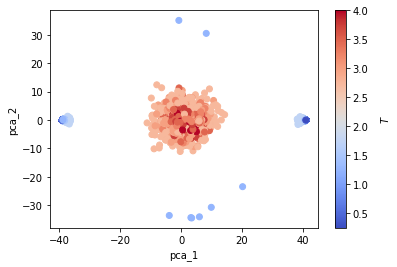

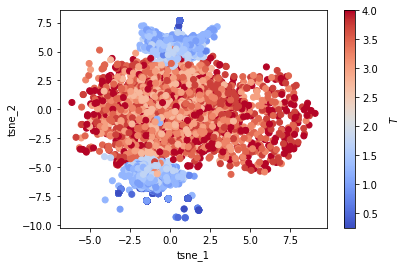

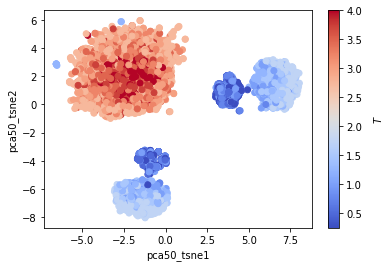

In [9]:
#plt.figure(figsize=(30,10))

#plt.subplot(1,2,1)
plt.figure()
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=dfr['T'], cmap='coolwarm')
plt.xlabel('pca_1')
plt.ylabel('pca_2')
cb = plt.colorbar()
cb.set_label(label='$T$', labelpad=10)
plt.show()

#plt.subplot(1,2,2)
plt.figure()
plt.scatter(X_tsne2[:,0], X_tsne2[:,1], c=dfr['T'], cmap='coolwarm')
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')
cb = plt.colorbar()
cb.set_label(label='$T$', labelpad=10)
plt.show()

plt.figure()
plt.scatter(X_pca50_tsne2[:,0], X_pca50_tsne2[:,1], c=dfr['T'], cmap='coolwarm')
plt.xlabel('pca50_tsne1')
plt.ylabel('pca50_tsne2')
cb = plt.colorbar()
cb.set_label(label='$T$', labelpad=10)
plt.show()

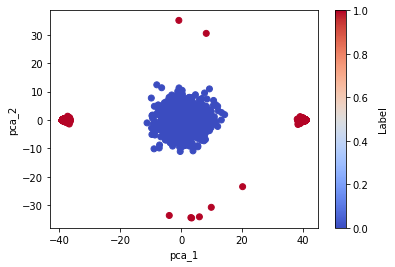

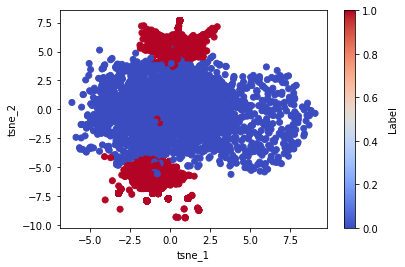

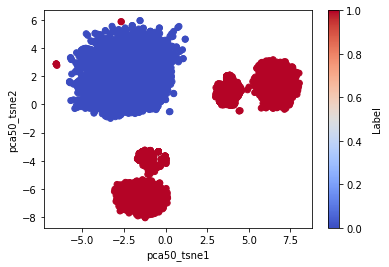

In [10]:
#plt.figure(figsize=(30,10))

#plt.subplot(1,2,1)
plt.figure()
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=dfr['label'], cmap='coolwarm')
plt.xlabel('pca_1')
plt.ylabel('pca_2')
cb = plt.colorbar()
cb.set_label(label='Label', labelpad=10)
plt.show()

#plt.subplot(1,2,2)
plt.figure()
plt.scatter(X_tsne2[:,0], X_tsne2[:,1], c=dfr['label'], cmap='coolwarm')
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')
cb = plt.colorbar()
cb.set_label(label='Label', labelpad=10)
plt.show()

plt.figure()
plt.scatter(X_pca50_tsne2[:,0], X_pca50_tsne2[:,1], c=dfr['label'], cmap='coolwarm')
plt.xlabel('pca50_tsne1')
plt.ylabel('pca50_tsne2')
cb = plt.colorbar()
cb.set_label(label='Label', labelpad=10)
plt.show()

In [22]:
X_umap1_pca50 = umap.UMAP(n_neighbors=5,
                          min_dist=0.3,
                          metric='correlation').fit_transform(X_st)

In [23]:
X_umap1_pca50 = umap.UMAP(n_neighbors=5,
                          min_dist=0.3,
                          metric='correlation').fit_transform(X_pca50)

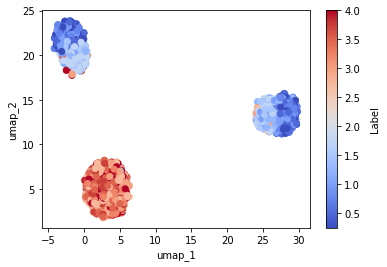

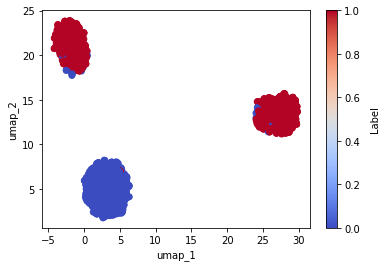

In [21]:
plt.figure()
plt.scatter(X_umap1[:,0], X_umap1[:,1], c=dfr['T'], cmap='coolwarm')
plt.xlabel('umap_1')
plt.ylabel('umap_2')
cb = plt.colorbar()
cb.set_label(label='Label', labelpad=10)
plt.show()

plt.figure()
plt.scatter(X_umap1[:,0], X_umap1[:,1], c=dfr['label'], cmap='coolwarm')
plt.xlabel('umap_1')
plt.ylabel('umap_2')
cb = plt.colorbar()
cb.set_label(label='Label', labelpad=10)
plt.show()

In [26]:
m = som.map(xdim=10, ydim=5)

In [27]:
print(dfr.shape)
dfr.columns

(6500, 1602)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1592', '1593', '1594', '1595', '1596', '1597', '1598', '1599', 'label',
       'T'],
      dtype='object', length=1602)

In [33]:
y = dfr['label'].values.tolist()
X = df_X.values.tolist()
#print(X.shape, y.shape)

In [35]:
#m.fit(X,y)
m.fit(df_X, dfr['label'])

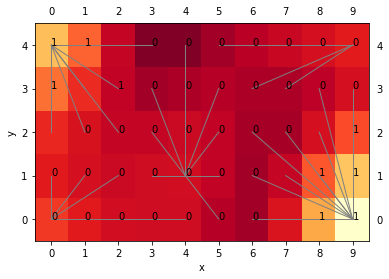

In [36]:
m.starburst()

In [41]:
df_pca_tsne = pd.DataFrame({'X1':X_pca50_tsne2[:,0], 
                           'X2': X_pca50_tsne2[:,1]
                          })

In [42]:
print(df_X.shape, dfr.shape, df_pca_tsne.shape)

(6500, 1600) (6500, 1602) (6500, 2)


In [45]:
m2 = som.map(xdim=10, ydim=5)

In [46]:
m2.fit(df_pca_tsne, dfr['label'])

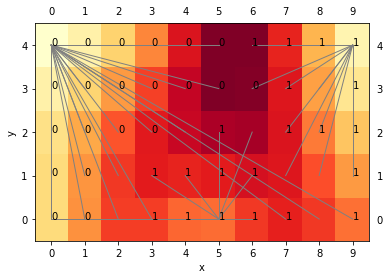

In [47]:
m2.starburst()